# Load Specter Embeddings

In [24]:
%load_ext autoreload
%autoreload 2

VECTOR_SIZE = 100

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Load Embeddings

In [2]:
VECTOR_COLS = [str(i) for i in range(768)]
COLUMNS = ['cord_uid'] + VECTOR_COLS
import pandas as pd
spector_path = '../data/CORD-19-research-challenge/cord19_specter_embeddings_2020-04-10/cord19_specter_embeddings_2020-04-10.csv'
%time embeddings = pd.read_csv(spector_path, names=COLUMNS).set_index('cord_uid')
embeddings

Wall time: 9.46 s


,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
cord_uid,,,,,,,,,,,,,,,,,,,,,
xqhn0vbp,0.277109,-2.974946,1.103587,9.312441,1.301328,-4.281131,-0.531885,-4.497644,-0.696714,3.888403,...,-0.319249,4.262276,2.845274,-1.656342,-2.584434,-4.678826,3.175534,4.890424,-1.488285,-1.301303
gi6uaa83,-0.344760,-4.762074,3.647769,2.616938,3.856543,-0.460272,0.899565,2.284138,0.590927,2.861983,...,-0.185362,0.603534,1.475987,1.804034,2.819780,-4.039684,-3.027682,0.997251,-0.661524,1.590745
le0ogx1s,-3.257521,-1.720686,1.438893,-1.614458,-3.205178,1.125262,-1.420612,-4.270585,-2.557855,-0.092169,...,-1.691883,0.594955,1.336509,0.036567,-2.065922,0.360089,0.832659,2.954574,-4.601091,-1.097578
fy4w7xz8,0.920366,-3.546179,-2.537739,6.372102,0.025263,-1.991629,-0.612892,0.983194,-2.316126,2.078352,...,-0.412801,0.831824,2.101388,3.283052,-3.075248,-4.381618,1.925288,4.607265,-1.254582,-1.320425
0qaoam29,-1.145982,-5.231421,-1.958305,5.035599,-1.601498,-0.756577,1.757929,1.490937,0.192156,-2.802254,...,0.131644,3.836460,1.115987,1.524282,-2.017589,-5.102140,3.864315,1.679577,1.871223,-0.295825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4xhcamks,-5.418158,-5.245474,3.628956,6.451151,3.634892,-2.335905,0.667048,-0.485650,0.193185,1.170576,...,0.523872,1.136867,0.720693,0.521212,-2.560610,-5.660248,3.487091,0.655311,0.436463,-2.991478
z2rqz3jx,2.785809,-3.396076,2.769620,3.735134,0.345574,-3.188008,-0.511677,-0.106290,0.542728,-3.533303,...,3.259372,0.605949,-5.456649,2.752270,4.745460,-2.562807,0.564394,-6.728393,-3.059293,0.375873
wncuc903,-1.541402,-7.471113,0.566562,10.698986,-0.464386,-1.495992,1.584507,-2.346224,1.693222,-1.344092,...,1.425641,0.519614,5.308790,4.999254,-2.539582,-0.886018,6.917359,5.901351,-3.215071,1.838168


In [5]:
embeddings.shape[1]

768

## 2. Create Full Spector Annoy Index

In [7]:
from annoy import AnnoyIndex
from pathlib import Path

def cord_support_dir():
    return Path('../cord') / 'cordsupport'

SPECTOR_INDEX_PATH = str((Path(cord_support_dir()) / 'SpectorSimilarity.ann').resolve())

num_papers, vector_length = embeddings.shape
annoy_index = AnnoyIndex(vector_length, 'angular')  
for i in range(num_papers):
    annoy_index.add_item(i, embeddings.values[i,:])

annoy_index.build(30)
annoy_index.save(SPECTOR_INDEX_PATH)

del annoy_index

## 3. Reduce Dimensions

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
embeddings_100 = pca.fit_transform(embeddings)

## 4. Create Annoy Index

In [9]:
from annoy import AnnoyIndex
from pathlib import Path

def cord_support_dir():
    return Path('../cord') / 'cordsupport'

SIMILARITY_INDEX_PATH = str((Path(cord_support_dir()) / 'PaperSimilarity.ann').resolve())

annoy_index = AnnoyIndex(100, 'angular')  
for i in range(embeddings_100.shape[0]):
    annoy_index.add_item(i, embeddings_100[i,:])

annoy_index.build(30)
annoy_index.save(SIMILARITY_INDEX_PATH)

True

In [10]:
assert annoy_index.get_n_items() == len(embeddings), \
                        f'expected {len(embeddings)} items in the annoy index but was {annoy_index.get_n_items()}'

## 4. Downsample to 2d and 1d, and get cluster ids

In [27]:
import numpy as np
RANDOM_STATE = 42
def kmean_labels(docvectors, n_clusters=8, random_state=RANDOM_STATE):
    print('Setting cluster labels')
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=n_clusters,
                    random_state=random_state).fit(docvectors)
    return kmeans.labels_, kmeans


def downsample(docvectors, dimensions=2):
    print(f'Downsampling to {dimensions}D embeddings')
    pca = PCA(n_components=dimensions, svd_solver='full')
    docvectors_downsampled = pca.fit_transform(docvectors)
    return np.squeeze(docvectors_downsampled), pca

vectors_2d = downsample(embeddings,2)
vectors_1d = downsample(embeddings,1)
cluster_ids, kmeans = kmean_labels(embeddings, n_clusters=8)

Downsampling to 2D embeddings
Downsampling to 1D embeddings
Setting cluster labels


## 4. Save to cord support dir

In [28]:
from pathlib import PurePath
document_vectors = pd.DataFrame({'cluster': cluster_ids,
                                 'x': vectors_2d[:,0],
                                 'y':  vectors_2d[:,1],
                                 '1d': vectors_1d.tolist(),
                                 '2d': vectors_2d.tolist()
                                }, index=embeddings.index)
document_vectors.to_parquet(PurePath(cord_support_dir()) / 'DocumentVectors.pq', compression='gzip')

## 5. Load the Document Vectors

In [29]:
document_vectors = pd.read_parquet(PurePath(cord_support_dir()) / 'DocumentVectors.pq')

In [25]:
assert len(document_vectors) == len(embeddings), 'The document vectors and the embeddings must be the same length'

In [30]:
document_vectors

,cluster,x,y,1d,2d
cord_uid,,,,,
xqhn0vbp,0,-16.746437,13.216263,-16.746437,"[-16.74643680817409, 13.216263026643853]"
gi6uaa83,0,1.966327,-2.207469,1.966327,"[1.9663268777746572, -2.2074688325530283]"
le0ogx1s,6,31.708845,8.587331,31.708845,"[31.708844578373675, 8.587330999326701]"
fy4w7xz8,3,-15.848964,16.420672,-15.848964,"[-15.848964066106522, 16.420671871807553]"
0qaoam29,0,-11.824390,16.038072,-11.824390,"[-11.824389780999928, 16.038071989756528]"
...,...,...,...,...,...
4xhcamks,0,-14.387657,14.782875,-14.387657,"[-14.387657268099522, 14.78287474341333]"
z2rqz3jx,2,61.959281,-10.688373,61.959281,"[61.95928137466404, -10.68837326333497]"
wncuc903,5,-11.071418,-17.693837,-11.071418,"[-11.071418250812455, -17.69383729083056]"


## Chart

In [31]:
import altair as alt

alt.Chart(document_vectors.sample(5000)).mark_circle().encode(
    x='x',
    y='y',
    color='cluster:N'
)

alt.Chart(...)

In [19]:
from cord import ResearchPapers

In [32]:
metadata = ResearchPapers.load_metadata()

Loading metadata from ..\data\CORD-19-research-challenge
Cleaning metadata
Applying tags to metadata


In [33]:
COLS = ['cord_uid', 'title','covid_related','virus','coronavirus','sars', 'cluster']
docs = document_vectors.merge(metadata, on='cord_uid', how='left')[COLS]

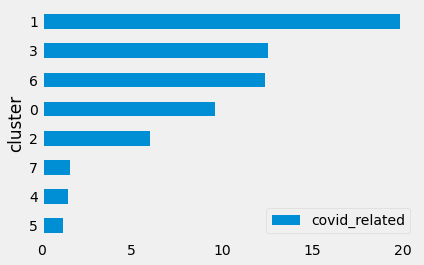

In [34]:
cluster_pct = docs[['cluster', 'covid_related']].groupby('cluster').sum() * 100 / \
                    docs[['cluster', 'covid_related']].groupby('cluster').count()

import matplotlib.style as style
style.use('fivethirtyeight')
cluster_pct.sort_values('covid_related').plot.barh(grid=False);

In [35]:
docs.query("cluster==1").sample(200)

,cord_uid,title,covid_related,virus,coronavirus,sars,cluster
28732,odfxkfu7,Molecular Mimicry in Multiple Sclerosis: Role ...,False,False,False,False,1
15426,j8e5juaj,Vaccination for Pandemic Influenza and Severe ...,False,False,False,False,1
37423,hfa1oahu,Detection of coronavirus in cases of tracheobr...,False,True,True,False,1
30163,r1yax86t,L. Miller K. Hurley Infectious Disease Managem...,False,False,False,False,1
48145,g45ydeip,Inhibition of Severe Acute Respiratory Syndrom...,False,True,True,True,1
...,...,...,...,...,...,...,...
29749,vijust53,L.N. Ornston A. Balows E. Greenberg Annual Rev...,False,False,False,False,1
26345,bqbxjofk,Comparative effectiveness and safety of ribavi...,True,True,True,False,1
11904,y77v6t1w,Infectious disease pandemic planning and respo...,False,False,False,False,1
11421,3pnpaer4,"Pathology of infectious diseases: new agents, ...",False,False,False,False,1
